In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ts_functions as ts
import ds_functions as ds
import statsmodels.tsa.seasonal as seasonal
def plot_components(series: pd.Series, comps: seasonal.DecomposeResult, x_label: str = 'Date', y_label:str =''):
    lst = [('Observed', series), ('trend', comps.trend), ('seasonal', comps.seasonal), ('residual', comps.resid)]
    _, axs = plt.subplots(len(lst), 1, figsize=(3*ts.HEIGHT, ts.HEIGHT*len(lst)))
    for i in range(len(lst)):
        axs[i].set_title(lst[i][0])
        axs[i].set_ylabel(y_label)
        axs[i].set_xlabel(x_label)
        axs[i].plot(lst[i][1])

## Deaths

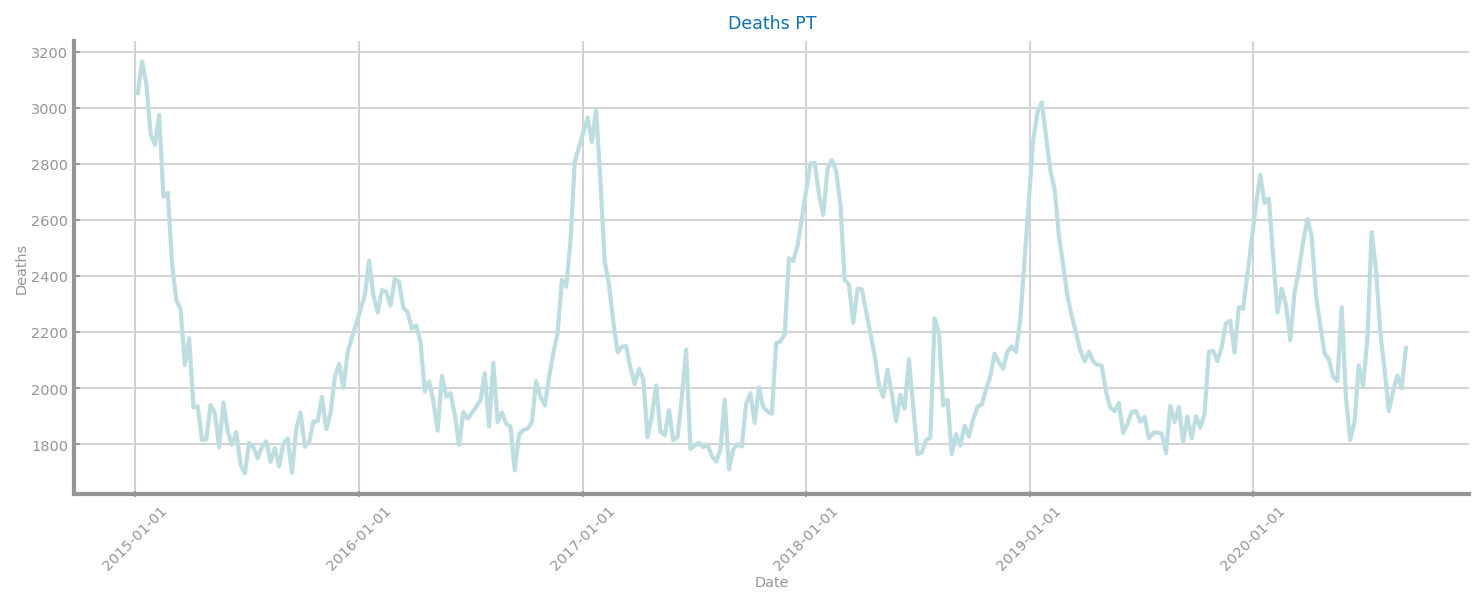

In [55]:
data = pd.read_csv('data/deaths_pt.csv', index_col='start_date', sep=',', decimal='.',
                   parse_dates=True, dayfirst=True)

x_label='Date'
y_label='Deaths'
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(data, x_label=x_label, y_label=y_label, title='Deaths PT')
plt.xticks(rotation = 45)
plt.show()

<Figure size 1800x300 with 0 Axes>

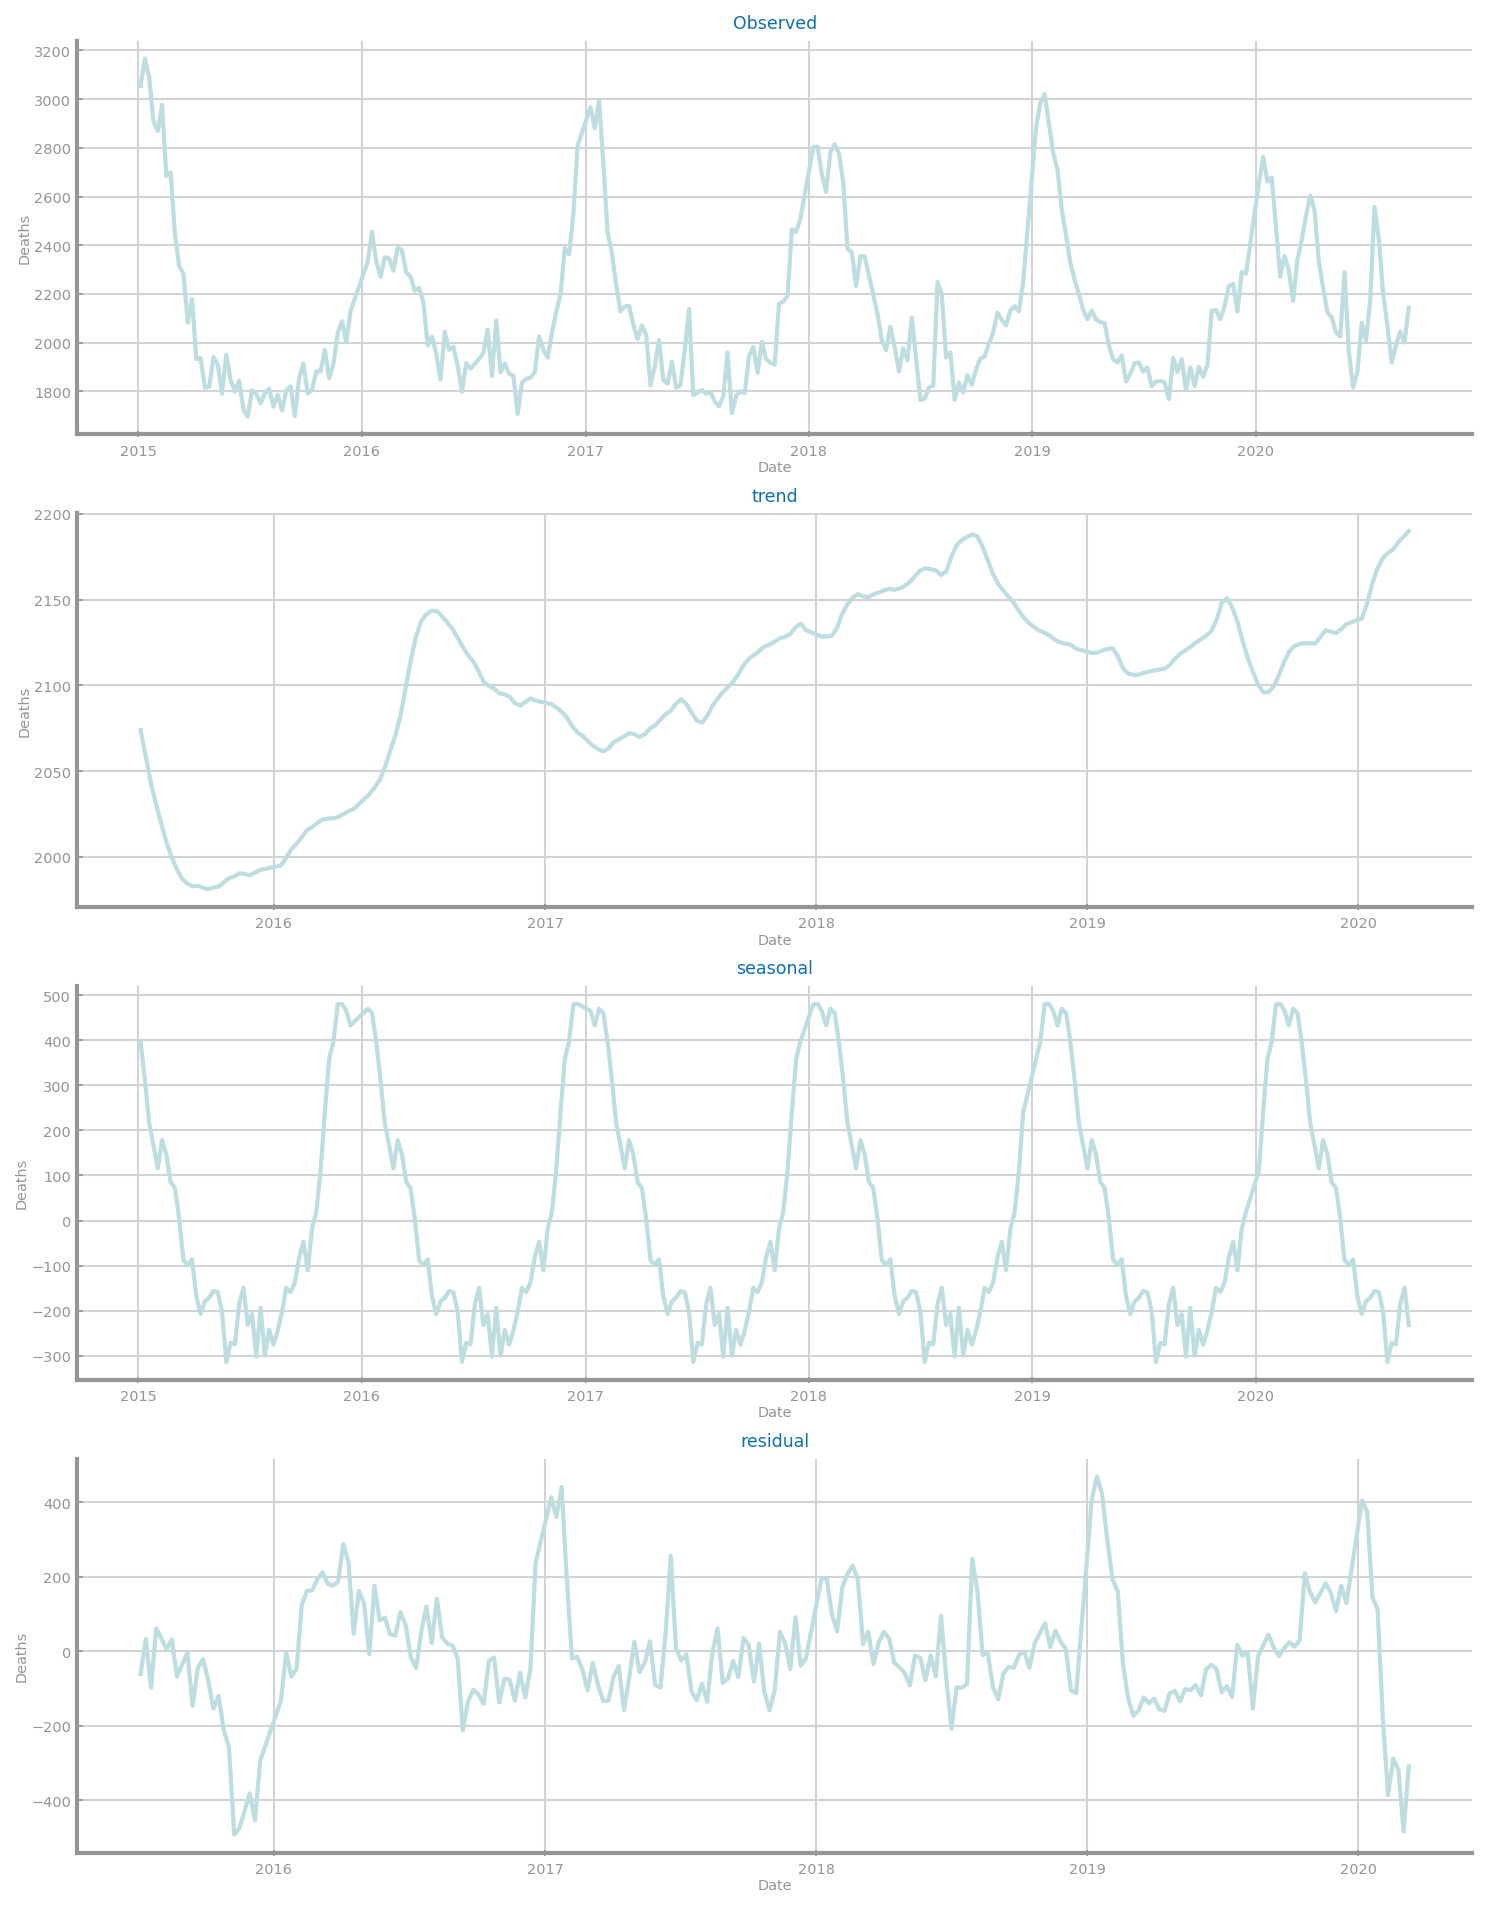

In [4]:
FIG_WIDTH, FIG_HEIGHT = 3*ts.HEIGHT, ts.HEIGHT/2
decomposition = seasonal.seasonal_decompose(data, model = "add",  period=52)
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_components(data, decomposition, x_label='Date', y_label='Deaths')
plt.show()

# ARIMA

In [29]:
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
FIG_WIDTH, FIG_HEIGHT = 3*ts.HEIGHT, ts.HEIGHT/2
x_label='Date'
y_label='Deaths'
def plot_forecasting(train: pd.Series, test: pd.Series, pred,
                     ax: plt.Axes=None, x_label: str = 'time', y_label:str =''):
    if ax is None:
        ax = plt.gca()
    ax.plot(train, label='train')
    ax.plot(test, label='test')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(pred.index, pred.values, label='predicted', color='r')
    plt.legend()
    
df = pd.read_csv('data/deaths_pt.csv', index_col='start_date', sep=',', decimal='.',
                   parse_dates=True, dayfirst=True)

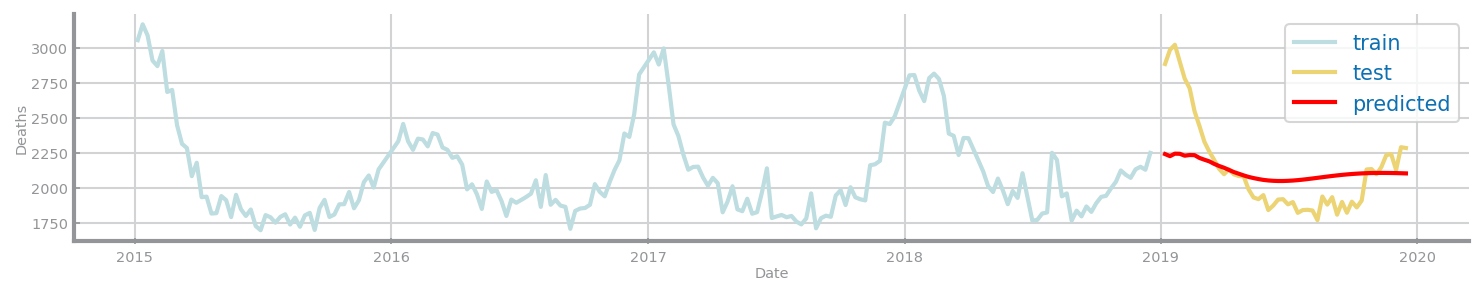

RMSE:274.1548876677519
MSE:75160.90243211767


In [59]:
p, d, q = 10, 0, 1
n = len(df)

train = []
train = df[:200]
test = df[200:250]

mod = ARIMA(train, order=(p, d, q))

mod = mod.fit()
#print(mod.summary())
pred = mod.predict(start = len(train), end = len(train)+len(test)-1)
pred.index = test.index

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_forecasting(train, test, pred, x_label=x_label, y_label=y_label)
plt.show()



print("RMSE:{}".format(sqrt(mean_squared_error(test,pred))))
print("MSE:{}".format(mean_squared_error(test,pred)))

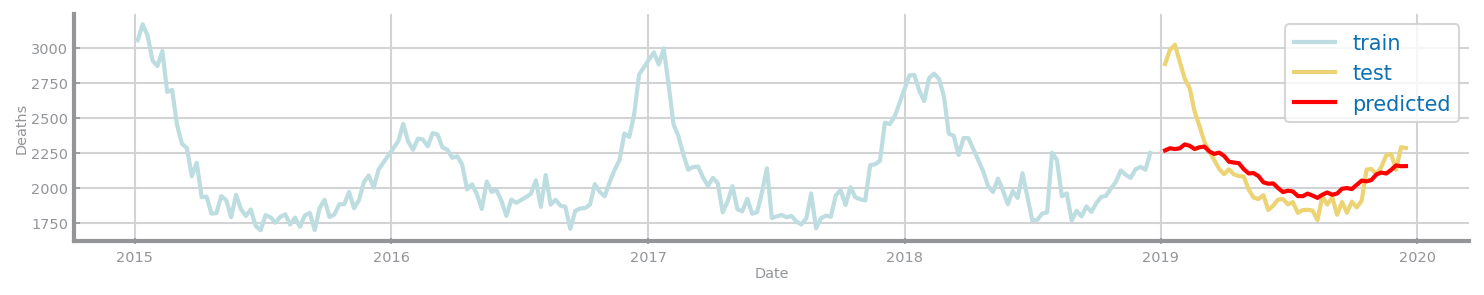

(7,0,3)
RMSE:236.32406705807784
MSE:55849.064670870874


In [62]:
import warnings
warnings.filterwarnings('ignore')
n = len(df)

train = []
train = df[:200]
test = df[200:250]

min_p = 0
min_q = 0
min_d = 0
min_RMSE = 1000000
for d in range(2):
    for q in range(10):
        for p in range(10):
            mod = ARIMA(train, order=(p, d, q))
            mod = mod.fit()
            pred = mod.predict(start = len(train), end = len(train)+len(test)-1)
            pred.index = test.index
            #print("({},{},{})".format(p,d,q))
            
            if mean_squared_error(test,pred) < min_RMSE:
                min_RMSE = mean_squared_error(test,pred)
                min_p = p
                min_q = q
                min_d = d
mod = ARIMA(train, order=(min_p, min_d, min_q))
mod = mod.fit()
pred = mod.predict(start = len(train), end = len(train)+len(test)-1)
pred.index = test.index
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_forecasting(train, test, pred, x_label=x_label, y_label=y_label)
plt.show()
print("({},{},{})".format(min_p,min_d,min_q))
print("RMSE:{}".format(sqrt(mean_squared_error(test,pred))))
print("MSE:{}".format(mean_squared_error(test,pred)))

In [24]:
date_rng = pd.date_range(start=pd.to_datetime('06/01/2020',dayfirst=True)
                         , end=pd.to_datetime('30/11/2020',dayfirst=True), freq='W-MON')
print(date_rng)
print(len(date_rng))

DatetimeIndex(['2020-01-06', '2020-01-13', '2020-01-20', '2020-01-27',
               '2020-02-03', '2020-02-10', '2020-02-17', '2020-02-24',
               '2020-03-02', '2020-03-09', '2020-03-16', '2020-03-23',
               '2020-03-30', '2020-04-06', '2020-04-13', '2020-04-20',
               '2020-04-27', '2020-05-04', '2020-05-11', '2020-05-18',
               '2020-05-25', '2020-06-01', '2020-06-08', '2020-06-15',
               '2020-06-22', '2020-06-29', '2020-07-06', '2020-07-13',
               '2020-07-20', '2020-07-27', '2020-08-03', '2020-08-10',
               '2020-08-17', '2020-08-24', '2020-08-31', '2020-09-07',
               '2020-09-14', '2020-09-21', '2020-09-28', '2020-10-05',
               '2020-10-12', '2020-10-19', '2020-10-26', '2020-11-02',
               '2020-11-09', '2020-11-16', '2020-11-23', '2020-11-30'],
              dtype='datetime64[ns]', freq='W-MON')
48


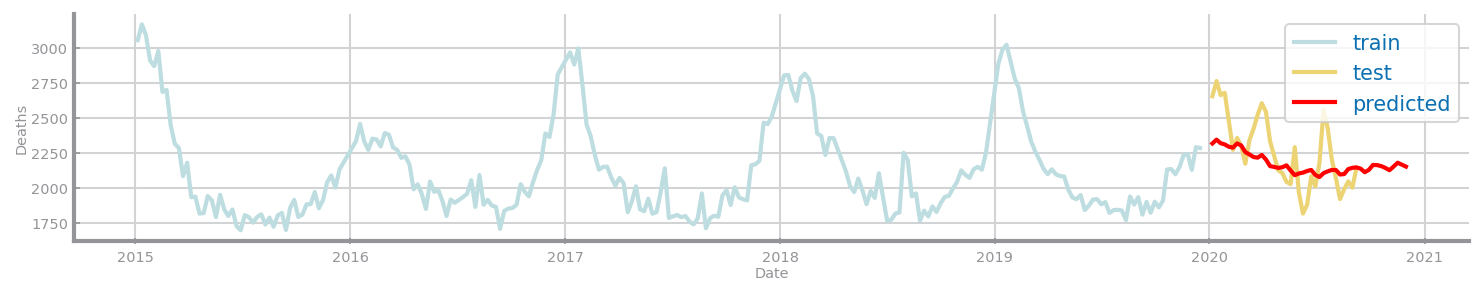

(8,1,6)
RMSE:213.87252885121958
MSE:45741.45859721575


In [31]:
n = len(df)

train = []
train = df[:250]
test = df[250:]

min_p = 0
min_q = 0
min_d = 0
min_RMSE = 1000000

for d in range(2):
    for q in range(10):
        for p in range(10):
            mod = ARIMA(train, order=(p, d, q))
            mod = mod.fit()
            pred = mod.predict(start = len(train), end = len(train)+len(date_rng)-1)
            pred.index = date_rng
            #print("({},{},{})".format(p,d,q))
            
            if mean_squared_error(test,pred[:len(test)]) < min_RMSE:
                min_RMSE = mean_squared_error(test,pred[:len(test)])
                min_p = p
                min_q = q
                min_d = d
mod = ARIMA(train, order=(min_p, min_d, min_q))
mod = mod.fit()
pred = mod.predict(start = len(train), end = len(train)+len(date_rng)-1)
pred.index = date_rng
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_forecasting(train, test, pred, x_label=x_label, y_label=y_label)
plt.show()
print("({},{},{})".format(min_p,min_d,min_q))
print("RMSE:{}".format(sqrt(mean_squared_error(test,pred[:len(test)]))))
print("MSE:{}".format(mean_squared_error(test,pred[:len(test)])))

In [32]:
date_rng = pd.date_range(start=pd.to_datetime('07/12/2020',dayfirst=True)
                         , end=pd.to_datetime('28/12/2020',dayfirst=True), freq='W-MON')
print(date_rng)
print(len(date_rng))

DatetimeIndex(['2020-12-07', '2020-12-14', '2020-12-21', '2020-12-28'], dtype='datetime64[ns]', freq='W-MON')
4


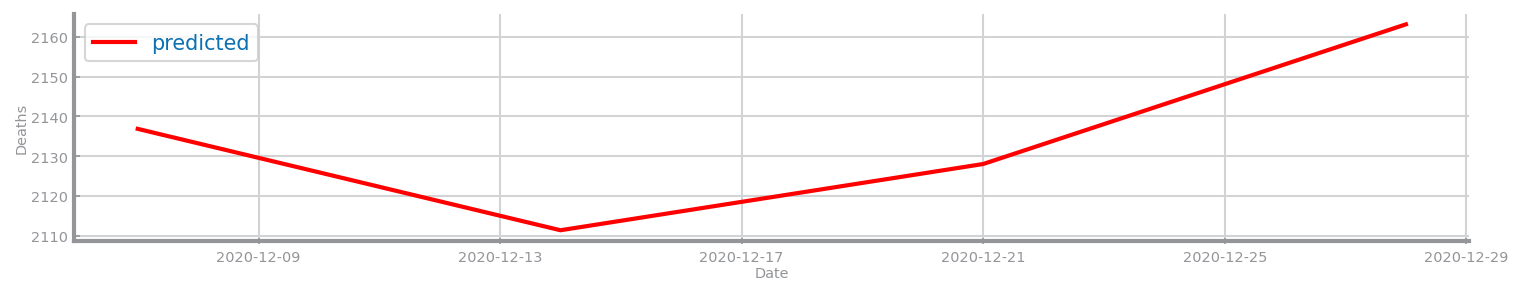

In [33]:
pred = mod.predict(start = len(train)+len(test), end = len(train)+len(test)+len(date_rng)-1)

pred.index = date_rng

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
ax = plt.gca()
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.plot(pred.index, pred.values, label='predicted', color='r')
plt.legend()
plt.show()